# Домашнее задание 4

Это домашнее задание по материалам второго семинаров. Дедлайн по отправке - 23:55 3 марта. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_4

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Рассмотрим задачу минимизации:
\begin{equation}
\min_{x \in \triangle_d} f(x) = \frac{1}{2}x^T A x,
\end{equation}
где в качестве матрицы $A$ - случайная матрица (уже умеем генерировать) с $L =1000$, $\mu = 1$, а $\triangle_d$ - вероятностный симплекс:
$$
\triangle_d = \{x ~|~ x_i \geq 0, \sum_{i=1}^d x_i = 1\}.
$$

__(а)__ Для такой задачи напишите итерацию зеркального спуска с дивергенцией Брегмана, порожденной энтропийной функцией. Найдите выражение для итерации метода в явном виде (без подсчетов $\arg\min$).

$x^{k + 1} = \arg\min_{x \in \triangle_d}(γx^TAx^k + \sum_{i=1}^d x_i \log \frac{x_i}{x^k_i})$

The problem is convex so we can use the KKT to find minimum. Let's find the Lagrangian and derive a KKT condition:

$L = γx^TAx^k + \sum_{i=1}^d x_i \log \frac{x_i}{x^k_i}) + ν(\sum_{i=1}^d x_i - 1)$

$∇_{x}L = 0 ⇒ L'|_{x_i} = 0 = γ(Ax^k)_i + \log \frac{x_i}{x^k_i} + 1 + ν$

$x_i = x_i^k \exp{(-ν - γ(Ax^k)_i - 1)} = x_i^k \frac{\exp (-γ(Ax^k)_i)}{\exp(1 + ν)}$

Summing by all dimensions we get:

$\exp(1 + ν) = \sum_{i=1}^d x_i^k \exp (-γ(Ax^k)_i)$

$$x_i = \frac{x^k \exp (-γ(Ax^k)_i)}{\sum_{i=1}^d x_i^k \exp (-γ(Ax^k)_i)}$$

__(б)__ Реализуйте метод зеркального спуска из пункта (а). Постройте для него график сходимости по времени и по итерациям. В качестве критерия сходимости используйте:
$$
\text{gap}(x^k) = \max_{y \in \triangle_d} \langle \nabla f(x^k), x^k - y \rangle,
$$
или усредненную версию $\frac{1}{k} \sum_{i=1}^k \text{gap}(x^i)$. Найдите выражение в явном виде для подсчета $\text{gap}(x^k)$.

$$
\text{gap}(x^k) = \max_{y \in \triangle_d} \langle \nabla f(x^k), x^k - y \rangle = \max_{y \in \triangle_d}  (x^k)^TAx^k - \min_{y \in \triangle_d}y^TAx^k = (x^k)^TAx^k - \min_{i}(Ax^k)_i
$$

In [2]:
import matplotlib.pyplot as plt
from scipy.stats import ortho_group
import numpy as np
from datetime import datetime as dt

In [3]:
def gen_A(d, mu, L): 
    U = ortho_group.rvs(dim = d)
    A = mu * np.eye(d)
    A[0][0] = L
    return U.T @ A @ U

def gap_criteria(x, A):
    return x.T @ A @ x - np.min(A @ x)

def f(x, A):
    return 1/2 * x.T @ A @ x

def grad_f(x, A):
    return A @ x

def mirror_descent(n_iter, X):
    x = np.array([1/d for _ in range(d)])
    crit_arr = []
    times = []
    t_0 = dt.now()
    gamma = -1/L

    for i in range(n_iter):
        x = x * np.exp(gamma * A @ x) / (np.sum(x * np.exp(gamma * A @ x)))

        crit_arr.append(gap_criteria(x, X))
        times.append(to_diff(t_0, dt.now()))
    
    return crit_arr, times

def plot_graph(x, y, x_label, y_label, title, logscale = True):
    plt.plot(x, y)
    if logscale == True:
        plt.yscale('log')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.show()

def to_diff(t1, t2):
    delta = t2 - t1
    diff_in_seconds = delta.total_seconds()
    return diff_in_seconds

In [4]:
L = 1000
d = 10
mu = 1
A = gen_A(d, mu, L)
n_iter = int(5e5)

md_crit_arr, md_times = mirror_descent(n_iter, A)

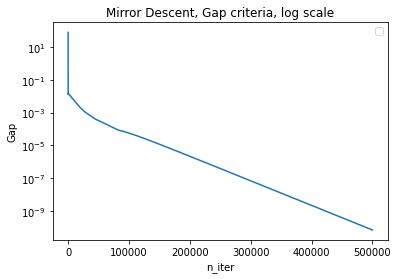

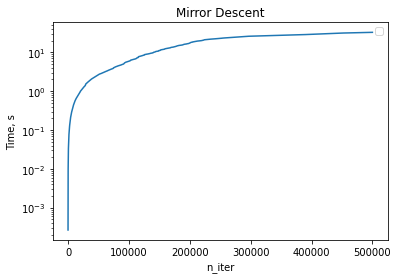

In [5]:
iter_arr = [_ for _ in range(n_iter)]

plot_graph(iter_arr, md_crit_arr, "n_iter", "Gap", "Mirror Descent, Gap criteria, log scale")
plot_graph(iter_arr, md_times,    "n_iter", "Time, s", "Mirror Descent")

__(в)__ Для этой же задачи напишите итерацию метода Франка-Вульфа. Реализуйте этот метод. Постройте для него график сходимости по времени и по итерациям. Добавьте эти графики к графикам для зеркального спуска. Сделайте вывод.

In [1]:
#ответ
def frank_wolfe(n_iter, X):
    x = np.array([1/d for _ in range(d)])

    crit_arr = []
    times = []
    t_0 = dt.now()
    
    for k in range(n_iter):
        s = np.zeros(d)
        s[np.argmin(A @ x)] = 1
        x = x + 2 / (k + 2) * (s - x)

        crit_arr.append(gap_criteria(x, X))
        times.append(to_diff(t_0, dt.now()))
    
    return crit_arr, times

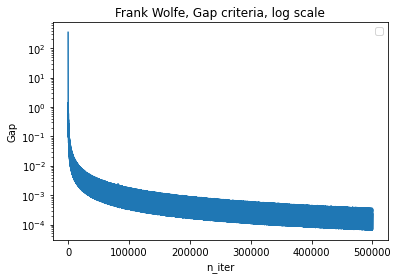

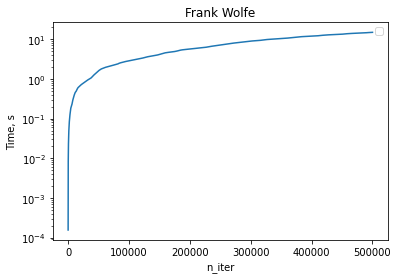

In [6]:
fw_crit_arr, fw_times = frank_wolfe(n_iter, A)
iter_arr = [_ for _ in range(n_iter)]

plot_graph(iter_arr, fw_crit_arr, "n_iter", "Gap", "Frank Wolfe, Gap criteria, log scale")
plot_graph(iter_arr, fw_times,    "n_iter", "Time, s", "Frank Wolfe")

**Conclusion**

In this sample the Mirror method went well, although the Frank Wolfe burst (

__Бонусные пункты__

__(г)__ Реализуйте метод градиентного спуска для нашей задачи. Для этого найдите в Интернете алгоритм евклидовой проекции на вероятностный симплекс. Постройте для градиентного спуска с евклидовой проекцией график сходимости по времени и по итерациям. Добавьте эти графики к графикам для зеркального спуска и метода Франка-Вульфа. Сделайте вывод.

In [7]:
#ответ

__(д)__ В [работе](https://sci-hub.ru/https://doi.org/10.1137/140992382) представлена ускоренная версия метода Франка-Вульфа (Алгоритм 2 для сильно выпуклой задачи). Он лучше с точки зрения теоретической сходимости по числу вызовов градиента. Реализуйте Алгоритм 2 для нашей задачи. Постройте график сходимости по времени и по количеству подсчетов $\nabla f$ (для предыдущих методов это было эквивалетно итерациям). Добавьте эти графики к графикам для остальных методов которые были получены выше. Сделайте вывод.

In [8]:
#ответ